<a href="https://colab.research.google.com/github/rishika-11/12-Dec-2023/blob/main/Epileptic_Seizure_Recognition_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

In [22]:
ESR = pd.read_csv("Epileptic Seizure Recognition.csv")

#    DATA PREPROCESSING



In [23]:
# Display the first few rows of the dataset
ESR.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


The number of trials for the non-seizure class is: 9200
The number of trials for the seizure class is: 2300


<ipython-input-24-ede7aa9cc3d7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tgt[tgt>1]=0


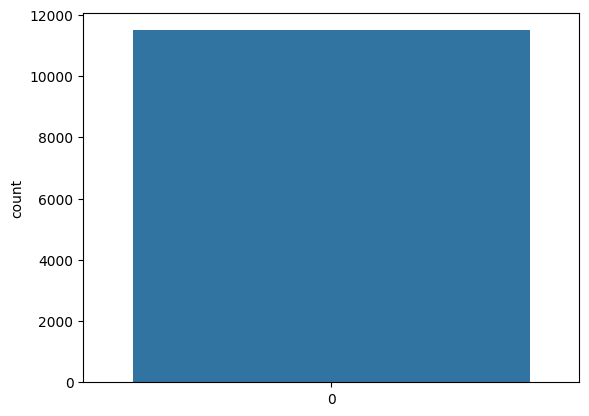

In [24]:
cols = ESR.columns   # Extract column names
tgt = ESR.y          # Extract the target variable 'y'
tgt[tgt>1]=0         # Convert values greater than 1 to 0
ax = sn.countplot(tgt,label="Count")     # Plot the count of each class
non_seizure, seizure = tgt.value_counts()
print('The number of trials for the non-seizure class is:', non_seizure)
print('The number of trials for the seizure class is:', seizure)

In [25]:
# Check for missing values
ESR.isnull().sum()

Unnamed    0
X1         0
X2         0
X3         0
X4         0
          ..
X175       0
X176       0
X177       0
X178       0
y          0
Length: 180, dtype: int64

In [26]:
# Display information about the dataset
ESR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Unnamed to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB


In [27]:
# Display descriptive statistics of the dataset
ESR.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,0.200000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,0.400017
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,0.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,0.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,0.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,0.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,1.000000


In [28]:
# Extract features (X) and target variable (y)
X = ESR.iloc[:,1:179].values
X.shape

(11500, 178)

Text(0.5, 0, 'Samples')

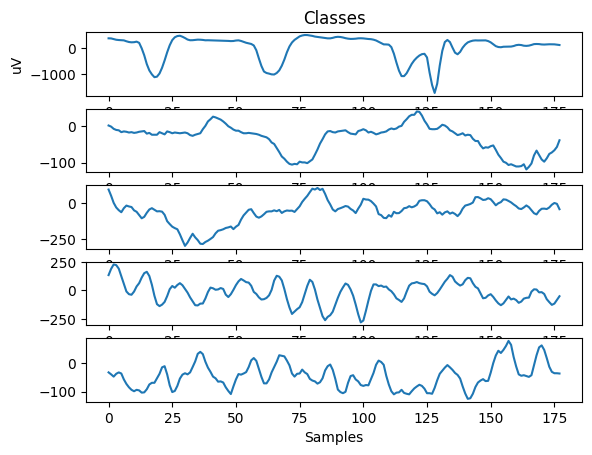

In [29]:
# Visualize a subset of samples for each class
plt.subplot(511)
plt.plot(X[1,:])
plt.title('Classes')
plt.ylabel('uV')
plt.subplot(512)
plt.plot(X[7,:])
plt.subplot(513)
plt.plot(X[12,:])
plt.subplot(514)
plt.plot(X[0,:])
plt.subplot(515)
plt.plot(X[2,:])
plt.xlabel('Samples')

In [30]:
y = ESR.iloc[:,179].values
y

array([0, 1, 0, ..., 0, 0, 0])

In [31]:
# Convert target variable values greater than 1 to 0
y[y>1]=0
y

array([0, 1, 0, ..., 0, 0, 0])

In [32]:

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [33]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# MODEL TRAINING AND EVALUATION

In [34]:
# Train a Logistic Regression model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred_log_reg = clf.predict(X_test)
acc_log_reg = round(clf.score(X_train, y_train) * 100, 2)
print (str(acc_log_reg) + ' %')

82.05 %


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
# Train an SVM model
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)
y_pred_svc = clf.predict(X_test)
acc_svc = round(clf.score(X_train, y_train) * 100, 2)
print (str(acc_svc) + '%')

98.29%


In [35]:
# Train a Linear SVM model
from sklearn.svm import SVC, LinearSVC
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred_linear_svc = clf.predict(X_test)
acc_linear_svc = round(clf.score(X_train, y_train) * 100, 2)
print (str(acc_linear_svc) + '%')

82.52%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [37]:
# Train a K-Nearest Neighbors model
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred_knn = clf.predict(X_test)
acc_knn = round(clf.score(X_train, y_train) * 100, 2)
print (str(acc_knn)+'%')

93.98%


In [38]:
# Train a Navie Bayes model
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred_gnb = clf.predict(X_test)
acc_gnb = round(clf.score(X_train, y_train) * 100, 2)
print (str(acc_gnb) + '%')

95.74%


In [40]:
# Apply Principal Component Analysis (PCA)
from sklearn.decomposition import PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
acc_PCA = round(pca.score(X_train, y_train) )
print (str(acc_PCA) + '%')

91%


In [39]:
#Importing keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Build an Artificial Neural Network (ANN) using Keras


In [43]:
classifier = Sequential()

In [47]:
classifier.add(Dense(activation="relu", input_dim=178, units=80, kernel_initializer="uniform"))

In [50]:
classifier.add(Dense(activation="relu", units=80, kernel_initializer="uniform"))

In [51]:
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

In [53]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#Fitting the ANN to the training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
920/920 [==============================] - 4s 3ms/step - loss: 0.1972 - accuracy: 0.9489
Epoch 2/100
920/920 [==============================] - 2s 2ms/step - loss: 0.1092 - accuracy: 0.9663
Epoch 3/100
920/920 [==============================] - 2s 2ms/step - loss: 0.0835 - accuracy: 0.9738
Epoch 4/100
920/920 [==============================] - 2s 2ms/step - loss: 0.0703 - accuracy: 0.9780
Epoch 5/100
920/920 [==============================] - 2s 2ms/step - loss: 0.0609 - accuracy: 0.9789
Epoch 6/100
920/920 [==============================] - 3s 3ms/step - loss: 0.0541 - accuracy: 0.9802
Epoch 7/100
920/920 [==============================] - 3s 3ms/step - loss: 0.0514 - accuracy: 0.9836
Epoch 8/100
920/920 [==============================] - 2s 2ms/step - loss: 0.0416 - accuracy: 0.9870
Epoch 9/100
920/920 [==============================] - 2s 2ms/step - loss: 0.0388 - accuracy: 0.9849
Epoch 10/100
920/920 [==============================] - 2s 2ms/step - loss: 0.0370 - accura

# Result Visualization

In [54]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
# Evaluate the ANN
acc_ANN = round(clf.score(X_train, y_train) * 100, 2)
print (str(acc_ANN) + '%')

72/72 [==============================] - 0s 2ms/step
95.74%


In [55]:
# Apply PCA to the training set
from sklearn.decomposition import PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
acc_PCA = round(pca.score(X_train, y_train) )
print (str(acc_PCA) + '%')

91%


In [56]:
# Create a DataFrame to compare model scores
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines','ANN',
              'KNN', 'Naive Bayes', 'Principal Component Analysis'],

    'Score': [acc_log_reg, acc_svc,acc_ANN ,
              acc_knn, acc_gnb,acc_PCA ]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
1,Support Vector Machines,98.29
2,ANN,95.74
4,Naive Bayes,95.74
3,KNN,93.98
5,Principal Component Analysis,91.00
0,Logistic Regression,82.05


from matplotlib import pyplot as plt
_df_0['Score'].plot(kind='hist', bins=20, title='Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Score'].plot(kind='line', figsize=(8, 4), title='Score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='Score', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)